In [114]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [118]:
import os
import sys

# Get the current notebook's directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(os.path.dirname(current_directory))

# Add the parent directory to the module search path
sys.path.insert(0, parent_directory)
print(parent_directory)

/n/holylabs/LABS/mzitnik_lab/Users/afang/GET


In [119]:
from data.pdb_utils import VOCAB

In [117]:
def get_distances(indexes, embeddings, distance_metric="euclidean", num_pairs=500):
    pairs = [random.sample(indexes, 2) for _ in range(num_pairs)]
    distances = []
    for pair in pairs:
        emb1 = embeddings[pair[0]]
        emb2 = embeddings[pair[1]]
        if distance_metric == "euclidean":
            dist = np.linalg.norm(emb1 - emb2)
        elif distance_metric == "cosine":
            dist = np.dot(emb1, emb2)/(np.linalg.norm(emb1)*np.linalg.norm(emb2))
        else:
            raise ValueError("Invalid distance metric")
        distances.append(dist)
    distances = np.array(distances)
    return distances

# Residue embeddings

## Pretrained

In [83]:
with open("data_pretrained/block_id.npy", "rb") as f:
    block_id = np.load(f)

with open("data_pretrained/block_embeddings.npy", "rb") as f:
    embeddings = np.load(f)

# Unique group IDs
unique_aa = np.unique(block_id)
unique_aa = unique_aa[(unique_aa < 37) & (unique_aa > 3)]

In [120]:
rand_dist = get_distances(range(0, len(block_id)), embeddings)
rand_dist = np.sort(rand_dist)
output = []
for aa in unique_aa:
    indexes = list((block_id == aa).nonzero()[0])
    distances = get_distances(indexes, embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((aa, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_abrv(x))
df

,aa,ks_stat,pvalue
0,GLY,0.244,1.798185e-13
1,ALA,0.304,8.571698e-21
2,VAL,0.392,1.141922e-34
3,LEU,0.316,1.837791e-22
4,ILE,0.336,2.130629e-25
5,PHE,0.302,1.601360e-20
6,TRP,0.246,1.091034e-13
7,TYR,0.272,1.117080e-16
8,ASP,0.298,5.515796e-20
9,HIS,0.256,8.416141e-15


In [101]:
aa_type = 12

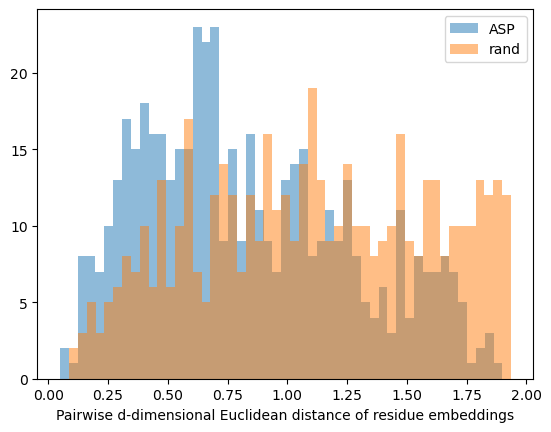

In [123]:
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), embeddings)
plt.hist(aa_dist, bins=50, alpha=0.5, label=VOCAB.idx_to_abrv(aa_type))
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()


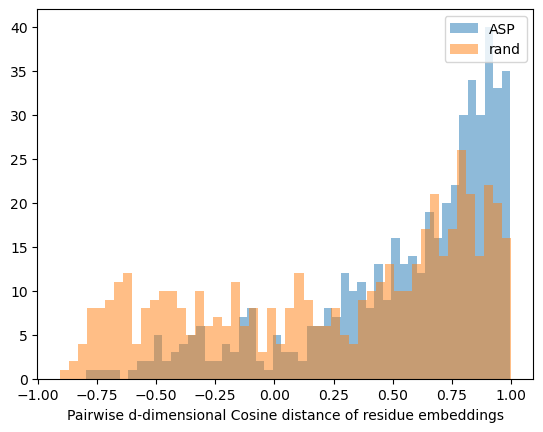

In [124]:
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), embeddings, distance_metric="cosine")
plt.hist(aa_dist, bins=50, alpha=0.5, label=VOCAB.idx_to_abrv(aa_type))
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Cosine distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()


## Finetuned

In [125]:
with open("data_finetuned/block_id.npy", "rb") as f:
    block_id = np.load(f)

with open("data_finetuned/block_embeddings.npy", "rb") as f:
    embeddings = np.load(f)

# Unique group IDs
unique_aa = np.unique(block_id)
unique_aa = unique_aa[(unique_aa < 37) & (unique_aa > 3)]

In [126]:
rand_dist = get_distances(range(0, len(block_id)), embeddings)
rand_dist = np.sort(rand_dist)
output = []
for aa in unique_aa:
    indexes = list((block_id == aa).nonzero()[0])
    distances = get_distances(indexes, embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((aa, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_abrv(x))
df

,aa,ks_stat,pvalue
0,GLY,0.256,8.416141e-15
1,ALA,0.252,2.375526e-14
2,VAL,0.346,6.129851e-27
3,LEU,0.294,1.866855e-19
4,ILE,0.308,2.423732e-21
5,PHE,0.284,3.644778e-18
6,TRP,0.252,2.375526e-14
7,TYR,0.256,8.416141e-15
8,ASP,0.266,5.833973e-16
9,HIS,0.224,2.106809e-11


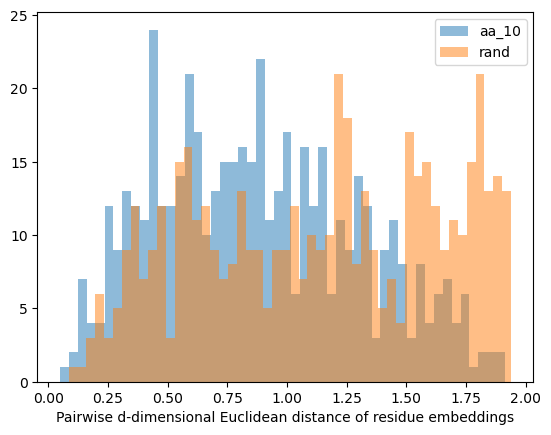

In [87]:
aa_type = 10
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), embeddings)
plt.hist(aa_dist, bins=50, alpha=0.5, label=f'aa_{aa_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()


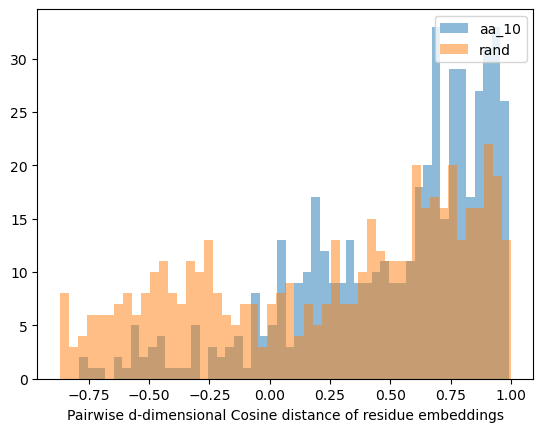

In [88]:
aa_type = 10
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), embeddings, distance_metric="cosine")
plt.hist(aa_dist, bins=50, alpha=0.5, label=f'aa_{aa_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Cosine distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()

# Atom embeddings

## Pretrained

In [127]:
with open("data_pretrained/atom_id.npy", "rb") as f:
    atom_id = np.load(f)
with open("data_pretrained/atom_embeddings.npy", "rb") as f:
    atom_embeddings = np.load(f)

atom_embeddings = atom_embeddings[atom_id > 2]
atom_id = atom_id[atom_id > 2]
atom_embeddings = atom_embeddings[:, :atom_embeddings.shape[1]//2] # remove block embedding that is concatenated to atom embedding

In [136]:
rand_dist = get_distances(range(0, len(atom_id)), atom_embeddings)
rand_dist = np.sort(rand_dist)
output = []
for atom in np.unique(atom_id):
    indexes = list((atom_id == atom).nonzero()[0])
    if len(indexes) < 50:
        output.append((atom, "not enough atoms", "not enough atoms"))
        continue
    distances = get_distances(indexes, atom_embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((atom, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_atom(x))
df

,aa,ks_stat,pvalue
0,C,0.042,0.770437
1,N,0.16,0.000005
2,O,0.038,0.863677
3,F,0.298,0.0
4,Na,not enough atoms,not enough atoms
5,Mg,1.0,0.0
6,P,0.484,0.0
7,S,0.088,0.041586
8,Cl,0.426,0.0
9,K,not enough atoms,not enough atoms


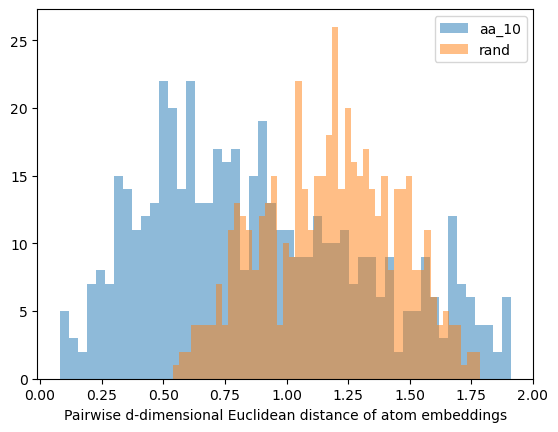

In [93]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings)
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()

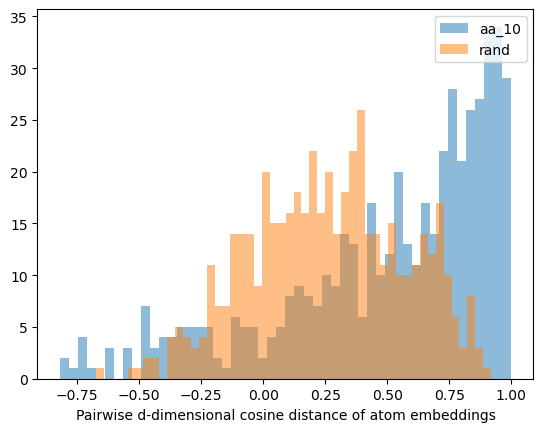

In [94]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings, distance_metric="cosine")
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional cosine distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()

## Finetuned

In [137]:
with open("data_finetuned/atom_id.npy", "rb") as f:
    atom_id = np.load(f)
with open("data_finetuned/atom_embeddings.npy", "rb") as f:
    atom_embeddings = np.load(f)

atom_embeddings = atom_embeddings[atom_id > 2]
atom_id = atom_id[atom_id > 2]
atom_embeddings = atom_embeddings[:, :atom_embeddings.shape[1]//2] # remove block embedding that is concatenated to atom embedding

In [138]:
rand_dist = get_distances(range(0, len(atom_id)), atom_embeddings)
rand_dist = np.sort(rand_dist)
output = []
for atom in np.unique(atom_id):
    indexes = list((atom_id == atom).nonzero()[0])
    if len(indexes) < 50:
        output.append((atom, "not enough atoms", "not enough atoms"))
        continue
    distances = get_distances(indexes, atom_embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((atom, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_atom(x))
df

,aa,ks_stat,pvalue
0,C,0.11,0.004687
1,N,0.164,0.000003
2,O,0.472,0.0
3,F,0.364,0.0
4,Na,not enough atoms,not enough atoms
5,Mg,1.0,0.0
6,P,0.792,0.0
7,S,0.324,0.0
8,Cl,0.39,0.0
9,K,not enough atoms,not enough atoms


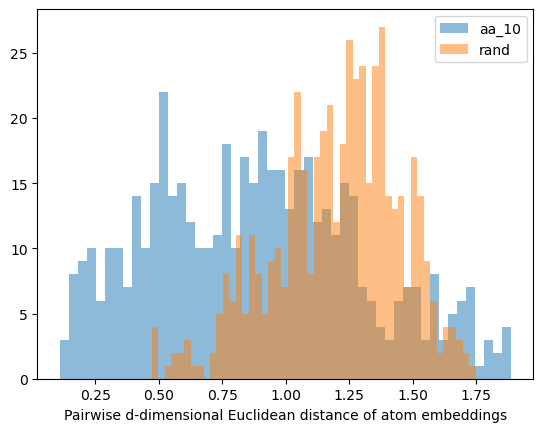

In [96]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings)
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()

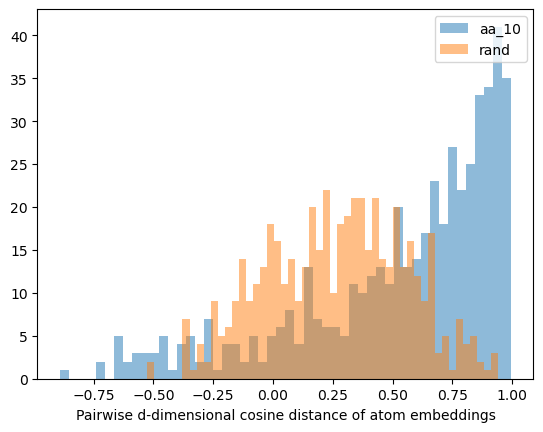

In [97]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings, distance_metric="cosine")
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional cosine distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()